<a href="https://colab.research.google.com/github/elybatista/Data_Science/blob/master/Unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Startups - Unicórnios

Por: Ely Batista - [Linkedin](https://www.linkedin.com/in/elybjunior)

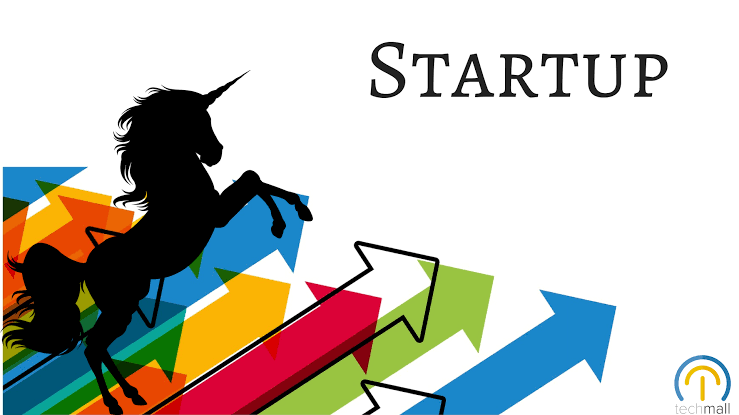

"Unicónio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão de dólares.

Entre alguns exemplos de empresas unicórnio brasileiras estão a Loggi, Nubank, 99 e PagSeguro.

### Sobre o conjunto de dados

Essa base de dados pode ser encontrada [aqui](https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups).

In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lendo os dados
df = pd.read_csv('/content/drive/MyDrive/Data/Startups+in+2021+end.csv')

In [3]:
# Verificando a dimensão dos dados
df.shape

(936, 8)

In [4]:
# Mostrando os primeiros registros
df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [5]:
# Visualizando o nome das colunas
df.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [6]:
# Renomeando colunas
df.rename( columns={
    'Unnamed: 0': 'Id',
    'Company': 'Empresa',
    'Valuation ($B)': 'Valor ($)',
    'Date Joined': 'Data de Adesão',
    'Country': 'País',
    'City': 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True)

In [7]:
df.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [8]:
# Verificando o tipo da informação em cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


Com as informações acima, podemos ver que precisamos modificar o tipo das colunas Valor e Data de Adesão para poder serem manipuladas.

Podermos ver também que as colunas Cidade e Investidores não estão completas, estão com alguns valores faltando. Vamos dar uma olhada melhor para podermos ver se a quantidade de dados faltantes vai interferir na análise.

In [9]:
# Verificando o total de campos nulos
df.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
País               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

In [10]:
# Verificando quais registros estão sem o preenchimento da cidade
df[df.Cidade.isnull()]

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores
11,11,FTX,$25,7/20/2021,Hong Kong,NaN,Fintech,"Sequoia Capital, Thoma Bravo, Softbank"
192,192,HyalRoute,$3.5,5/26/2020,Singapore,NaN,Mobile & telecommunications,Kuang-Chi
399,399,Advance Intelligence Group,$2,9/23/2021,Singapore,NaN,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund"
572,572,Trax,$1.3,7/22/2019,Singapore,NaN,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T..."
677,677,Amber Group,$1.1,6/21/2021,Hong Kong,NaN,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve..."
682,682,Carousell,$1.1,9/15/2021,Singapore,NaN,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent..."
735,735,WeLab,$1,11/8/2017,Hong Kong,NaN,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene..."
812,812,PatSnap,$1,3/16/2021,Singapore,NaN,Internet software & services,"Sequoia Capital China, Shunwei Capital Partner..."
840,840,Moglix,$1,5/17/2021,Singapore,NaN,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway"
843,843,Matrixport,$1,6/1/2021,Singapore,NaN,Fintech,"Dragonfly Captial, Qiming Venture Partners, DS..."


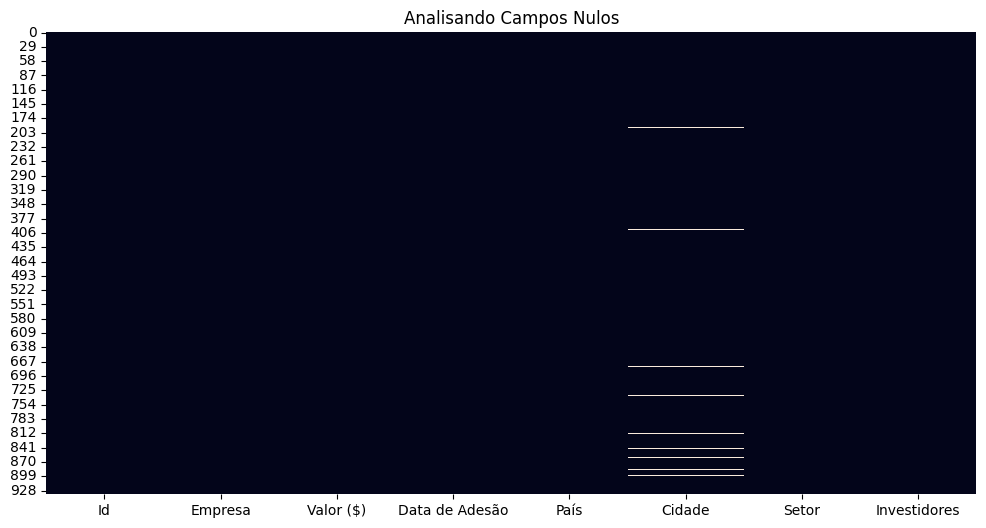

In [11]:
# Visualização gráfica dos campos nulos da base de dados
plt.figure( figsize=(12,6) )
plt.title('Analisando Campos Nulos')
sns.heatmap( df.isnull(), cbar=False );

Como a análise vai ser feita em cima de outros campos e não em Cidades, que é o campo que está faltando informações em 15 registros, optei por ignorar esses dados que faltam.

In [12]:
# Verificando campos únicos de cada coluna
df.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
País               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

## Análise por Setor

In [13]:
# Como a análise vai ser em cima do campo Setor
# Vamos ver os valores únicos desta coluna
df['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [14]:
# Valores únicos ranqueados (Setores)
df['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

Podemos ver acima que os setores de 'Fintech', 'Internet software & services' e 'E-commerce & direct-to-consumer', são os três setores que mais tem Startups.

Mas, analisando os dados, podemos ver que existem alguns erros, que provavelmente pode ser de digitação (entrada do usuário). Por exemplo: Existe um setor chamado 'Artificial intelligence' e encontramos também um setor chamado 'Artificial Intelligence'. O mesmo nome, mas com uma simples diferença da letra 'i' minúscula no primeiro e maiúscula no segundo. Outro erro encontrado é o 'Fintech' e 'Finttech', com a única diferença que o segundo está com duas letras 't'.

Vamos corrigir esses erros.

In [15]:
# Corrigindo a diferença de nomes de 'Artificial Intelligence' para 'Artificial intelligence'
df['Setor'] =  df['Setor'].apply( lambda Linha: Linha.replace('Artificial Intelligence', 'Artificial intelligence') )

In [16]:
# Corrigindo a diferença de nomes de 'Finttech' para 'Fintech'
df['Setor'] =  df['Setor'].apply( lambda Linha: Linha.replace('Finttech', 'Fintech') )

Com as correções acima, podemos ver a baixo que a quantidade de setores mudou. Antes tinhamos 17, com as correções temos agora 15.

In [17]:
# Verificando campos únicos da coluna Setor
df.nunique()[6:7]

Setor    15
dtype: int64

In [18]:
# Setores ranqueados com a nova atualização
df['Setor'].value_counts()

Fintech                                191
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 73
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Name: Setor, dtype: int64

In [19]:
# Quantidade de empresas nos três maiores setores
df['Setor'].value_counts()[:3].sum()

460

In [20]:
# Setores ranqueados percentualmente %
round( df['Setor'].value_counts( normalize=True ) * 100, 1)

Fintech                                20.4
Internet software & services           17.8
E-commerce & direct-to-consumer        10.9
Artificial intelligence                 7.8
Health                                  6.7
Other                                   5.4
Supply chain, logistics, & delivery     5.4
Cybersecurity                           4.4
Mobile & telecommunications             4.0
Data management & analytics             3.8
Hardware                                3.4
Auto & transportation                   3.1
Edtech                                  2.9
Consumer & retail                       2.5
Travel                                  1.4
Name: Setor, dtype: float64

In [21]:
 # Os três maiores setores ranqueados percentualmente %
round( df['Setor'].value_counts( normalize=True )[:3] * 100, 1)

Fintech                            20.4
Internet software & services       17.8
E-commerce & direct-to-consumer    10.9
Name: Setor, dtype: float64

In [22]:
 # Total percentual % dos três maiores setores
round( df['Setor'].value_counts( normalize=True )[:3] * 100, 1).sum()

49.1

Os setores de 'Fintech', 'Internet software & services' e 'E-commerce & direct-to-consumer', tem uma parcela de 49% das Startups existentes no mundo. São 460 Startups nesses três setores de um total de 936.

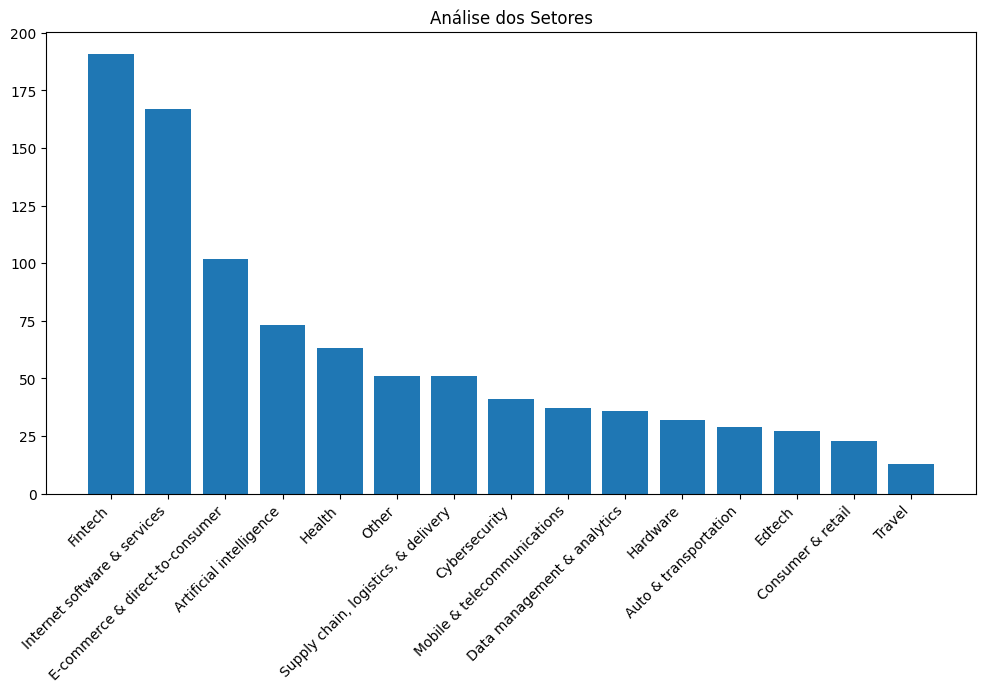

In [23]:
# Visualizando os Setores graficamente
plt.figure( figsize=(12,6) )
plt.title('Análise dos Setores')
plt.bar( df['Setor'].value_counts().index, df['Setor'].value_counts() )
plt.xticks( rotation=45, ha='right' );

Podemos ver graficamente que o setor de Fintech é o que mais faz unicórnio atualmente.

## Análise por País

In [24]:
# Vamos ver a quantidade de Startups por país
df['País'].value_counts()

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

Com base nos dados acima, podemos ver que os Estados Unidos é o maior gerador de Startups e junto com a China são os dois países que mais geram Startups no mundo. O Brasil fica em oitavo lugar junto com o Canadá na geração de Startups.

Podemos ver que existe um erro de digitação em 'United States,' com uma virgula adicionada, diferente de 'United States'. Fazendo com que esse registro não seja adicionado. A mesma coisa acontece com 'Indonesia,'.

Vamos corrigir isso.

In [25]:
# Corrigindo a diferença de 'United States,' para 'United States'
df['País'] =  df['País'].apply( lambda Linha: Linha.replace('United States,', 'United States') )

In [26]:
# Corrigindo a diferença de 'Indonesia,' para 'Indonesia,'
df['País'] =  df['País'].apply( lambda Linha: Linha.replace('Indonesia,', 'Indonesia') )

Vamos ver a quantidade de Startups por país corrigido.

In [27]:
# Vamos ver a quantidade de Startups por país
df['País'].value_counts()

United States           478
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Australia                 6
Japan                     6
Indonesia                 5
Mexico                    5
Netherlands               5
Spain                     4
Switzerland               4
Sweden                    4
Norway                    3
United Arab Emirates      3
Ireland                   3
Austria                   2
Finland                   2
Thailand                  2
South Africa              2
Turkey                    2
Denmark                   2
Philippines               2
Colombia                  2
Belgium                   2
Luxembourg                1
Nigeria                   1
Santa Clara               1
Vietnam             

In [28]:
# Análise dos países em porcentagem
round( df['País'].value_counts( normalize=True ) * 100, 1 )

United States           51.1
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Australia                0.6
Japan                    0.6
Indonesia                0.5
Mexico                   0.5
Netherlands              0.5
Spain                    0.4
Switzerland              0.4
Sweden                   0.4
Norway                   0.3
United Arab Emirates     0.3
Ireland                  0.3
Austria                  0.2
Finland                  0.2
Thailand                 0.2
South Africa             0.2
Turkey                   0.2
Denmark                  0.2
Philippines              0.2
Colombia                 0.2
Belgium                  0.2
Luxembourg               0.1
Nigeria                  0.1
Santa Clara   

In [29]:
# Total dos dois maiores países em porcentagem
round( df['País'].value_counts( normalize=True )[:2] * 100, 1 ).sum()

69.2

In [30]:
# Outra forma de fazer a conta da porcentagem dos dois maiores criadores de Startups
((df['País'].value_counts(normalize=True)[:1].values * 100) + (df['País'].value_counts(normalize=True)[1:2].values * 100))[0]

69.12393162393163

Com base no percentual, podemos ver que os Estados Unidos junto com a China geraram 69% das Startups.

Vamos ver isso graficamente.

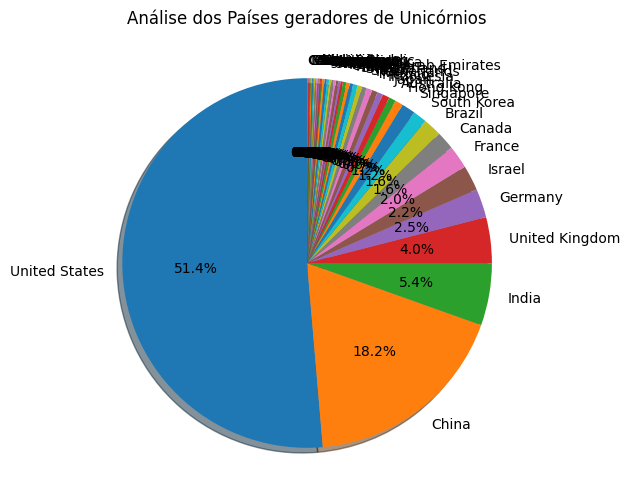

In [31]:
# Vamos visualizar em um gráfico de Pizza
analise = round( df['País'].value_counts( normalize=True ) * 100, 1 )

plt.figure( figsize=(15,6) )
plt.title('Análise dos Países geradores de Unicórnios')
plt.pie(analise, labels = analise.index, shadow=True,
        startangle=90, autopct='%1.1f%%');

O gráfico de pizza é sempre um problema com uma quantidade grande de informações, as legendas, o tamanho das fatias, as cores, etc. Muitas informações acabam perdendo o intuito do gráfico que é facilitar a visualização.

O gráfico de barras e colunas são bem melhores e mais fáceis de compreender.

Vamos ver a mesma informação em um gráfico de barras.

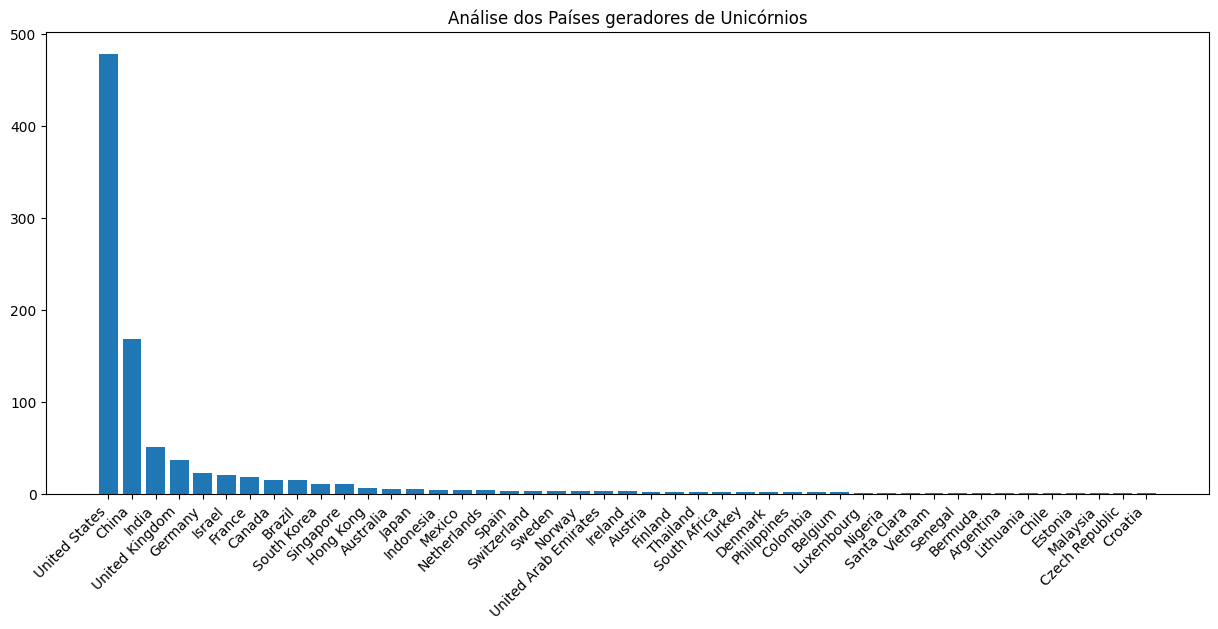

In [32]:
# Vamos visualizar em um gráfico de Barras
plt.figure( figsize=(15,6) )
plt.title('Análise dos Países geradores de Unicórnios')
plt.bar( df['País'].value_counts().index, df['País'].value_counts() )
plt.xticks( rotation=45, ha='right' );

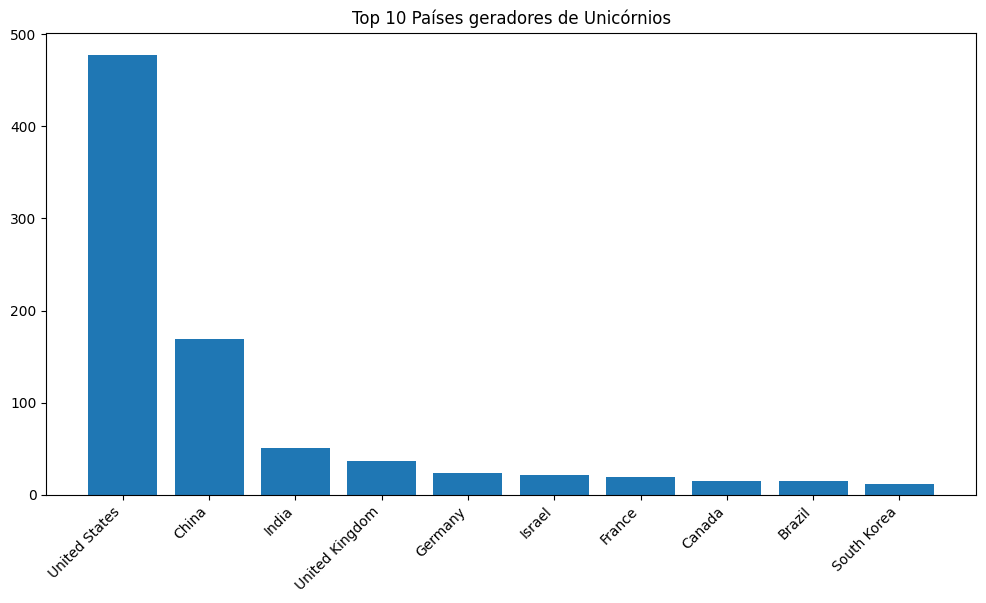

In [33]:
# Vamos visualizar em um gráfico de Barras os Top 10
plt.figure( figsize=(12,6) )
plt.title('Top 10 Países geradores de Unicórnios')
plt.bar( df['País'].value_counts()[:10].index, df['País'].value_counts()[:10] )
plt.xticks( rotation=45, ha='right' );

In [34]:
# Pegando o nome dos países para usar a biblioteca geopy para pegar as coordenadas
# de cada um e colocar em um dicionário

from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent='HeatMapAuto')
geolocator = Nominatim(user_agent='GetLoc')

paises = {}

for pais in df['País']:
  if pais not in paises:  # Verifica se o país existe no dicionário
    localizacao = geolocator.geocode(pais)
    paises[pais] = [localizacao.latitude, localizacao.longitude, 1]
  else:
    paises[pais][2] = paises[pais][2] + 1


In [35]:
# Dicionário contendo os países, suas coordenadas e quantidade de Startups
paises

{'China': [35.000074, 104.999927, 169],
 'United States': [39.7837304, -100.445882, 478],
 'Sweden': [59.6749712, 14.5208584, 4],
 'Australia': [-24.7761086, 134.755, 6],
 'United Kingdom': [54.7023545, -3.2765753, 37],
 'Brazil': [-10.3333333, -53.2, 15],
 'Hong Kong': [22.350627, 114.1849161, 7],
 'India': [22.3511148, 78.6677428, 51],
 'Indonesia': [-2.4833826, 117.8902853, 5],
 'Germany': [51.1638175, 10.4478313, 23],
 'Mexico': [23.6585116, -102.0077097, 5],
 'Canada': [61.0666922, -107.991707, 15],
 'Turkey': [38.9597594, 34.9249653, 2],
 'South Korea': [36.638392, 127.6961188, 11],
 'Netherlands': [52.2434979, 5.6343227, 5],
 'Israel': [30.8124247, 34.8594762, 21],
 'Colombia': [4.099917, -72.9088133, 2],
 'Belgium': [50.6402809, 4.6667145, 2],
 'Lithuania': [55.3500003, 23.7499997, 1],
 'Estonia': [58.7523778, 25.3319078, 1],
 'France': [46.603354, 1.8883335, 19],
 'Austria': [47.59397, 14.12456, 2],
 'Ireland': [52.865196, -7.9794599, 3],
 'Singapore': [1.357107, 103.8194992, 

In [81]:
# Dicionário contendo o nome dos países, as coordenadas e quantidade de startups
# Usar caso haja problemas com a biblioteca geopy
'''paises = {'China': [35.000074, 104.999927, 169],
 'United States': [39.7837304, -100.445882, 478],
 'Sweden': [59.6749712, 14.5208584, 4],
 'Australia': [-24.7761086, 134.755, 6],
 'United Kingdom': [54.7023545, -3.2765753, 37],
 'Brazil': [-10.3333333, -53.2, 15],
 'Hong Kong': [22.2793278, 114.1628131, 7],
 'India': [22.3511148, 78.6677428, 51],
 'Indonesia': [-2.4833826, 117.8902853, 4],
 'Germany': [51.1638175, 10.4478313, 23],
 'Mexico': [23.6585116, -102.0077097, 5],
 'Canada': [61.0666922, -107.991707, 15],
 'Turkey': [38.9597594, 34.9249653, 2],
 'South Korea': [36.638392, 127.6961188, 11],
 'Netherlands': [52.2434979, 5.6343227, 5],
 'Israel': [30.8124247, 34.8594762, 21],
 'Colombia': [4.099917, -72.9088133, 2],
 'Belgium': [50.6402809, 4.6667145, 2],
 'Lithuania': [55.3500003, 23.7499997, 1],
 'Estonia': [58.7523778, 25.3319078, 1],
 'France': [46.603354, 1.8883335, 19],
 'Austria': [47.59397, 14.12456, 2],
 'Ireland': [52.865196, -7.9794599, 3],
 'Singapore': [1.357107, 103.8194992, 11],
 'Vietnam': [15.9266657, 107.9650855, 1],
 'United Arab Emirates': [24.0002488, 53.9994829, 3],
 'Switzerland': [46.7985624, 8.2319736, 4],
 'Argentina': [-34.9964963, -64.9672817, 1],
 'Spain': [39.3260685, -4.8379791, 4],
 'Japan': [36.5748441, 139.2394179, 6],
 'Luxembourg': [49.8158683, 6.1296751, 1],
 'Nigeria': [9.6000359, 7.9999721, 1],
 'Finland': [63.2467777, 25.9209164, 2],
 'Philippines': [12.7503486, 122.7312101, 2],
 'Denmark': [55.670249, 10.3333283, 2],
 'Senegal': [14.4750607, -14.4529612, 1],
 'Bermuda': [32.30382, -64.7561647, 1],
 'Norway': [60.5000209, 9.0999715, 3],
 'South Africa': [-28.8166236, 24.991639, 2],
 'Chile': [-31.7613365, -71.3187697, 1],
 'Thailand': [14.8971921, 100.83273, 2],
 'Malaysia': [4.5693754, 102.2656823, 1],
 'Czech Republic': [49.7439047, 15.3381061, 1],
 'Croatia': [45.5643442, 17.0118954, 1],
 'Indonesia,': [-2.4833826, 117.8902853, 1]}'''

"paises = {'China': [35.000074, 104.999927, 169],\n 'United States': [39.7837304, -100.445882, 478],\n 'Sweden': [59.6749712, 14.5208584, 4],\n 'Australia': [-24.7761086, 134.755, 6],\n 'United Kingdom': [54.7023545, -3.2765753, 37],\n 'Brazil': [-10.3333333, -53.2, 15],\n 'Hong Kong': [22.2793278, 114.1628131, 7],\n 'India': [22.3511148, 78.6677428, 51],\n 'Indonesia': [-2.4833826, 117.8902853, 4],\n 'Germany': [51.1638175, 10.4478313, 23],\n 'Mexico': [23.6585116, -102.0077097, 5],\n 'Canada': [61.0666922, -107.991707, 15],\n 'Turkey': [38.9597594, 34.9249653, 2],\n 'South Korea': [36.638392, 127.6961188, 11],\n 'Netherlands': [52.2434979, 5.6343227, 5],\n 'Israel': [30.8124247, 34.8594762, 21],\n 'Colombia': [4.099917, -72.9088133, 2],\n 'Belgium': [50.6402809, 4.6667145, 2],\n 'Lithuania': [55.3500003, 23.7499997, 1],\n 'Estonia': [58.7523778, 25.3319078, 1],\n 'France': [46.603354, 1.8883335, 19],\n 'Austria': [47.59397, 14.12456, 2],\n 'Ireland': [52.865196, -7.9794599, 3],\n 'Si

In [37]:
import folium

mapa = folium.Map( location=[0, 0], zoom_start=2 )

for key, value in paises.items():
  if int(value[2]) > 100:
    folium.Marker(
        location=[ value[0], value[1]],
        tooltip = key + ': \n' + str(value[2]) + ' Startups',
        icon=folium.map.Icon(color='red')
        ).add_to(mapa)
  elif int(value[2]) > 10 and int(value[2]) < 100:
    folium.Marker(
        location=[ value[0], value[1]],
        tooltip = key + ': \n' + str(value[2]) + ' Startups',
        icon=folium.map.Icon(color='orange')
        ).add_to(mapa)
  else:
    folium.Marker(
        location=[ value[0], value[1]],
        tooltip = key + ': \n' + str(value[2]) + ' Startups'
        ).add_to(mapa)

mapa


Vemos no mapa acima os países com Startups.

*   De vermelho os países com mais de 100 startups.
*   De laranja os países com mais de 10 e menos de 100 startups.
*   De azul os países com menos de 10 startups.

Podemos ver um erro nos dados quando mostra que a cidade de Santa Clara nos EUA, está sendo mostrada como um país.

Dessa forma, só podemos perceber o erro plotando os dados no mapa. Se tivessemos que olhar toda a base de dados manualmente seria um problema. Então, visualizar os dados de forma diferente facilita encontrar erros.







In [38]:
# Buscando o registro onde o país está como Santa Clara
df[df.País == 'Santa Clara']

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores
394,394,Aviatrix,$2,9/8/2021,Santa Clara,United States,Internet software & services,"Ignition Partners, Formation 8, CRV"


Podemos ver acima que no registro 394 está trocada as informações de País e Cidade.

Vamos inverter esses dados.

In [39]:
df.loc[394,'País'] = 'United States'

In [40]:
df.loc[394, 'Cidade'] = 'Santa Clara'

In [41]:
# Buscando novamente se existe um país chamado Santa Clara
df[df.País == 'Santa Clara']

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores


In [42]:
# Localizando os registros da cidade de Santa Clara
df[df.Cidade == 'Santa Clara']

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores
68,68,Netskope,$7.5,11/13/2018,United States,Santa Clara,Cybersecurity,"Lightspeed Venture Partners, Social Capital, A..."
340,340,Eightfold.ai,$2.1,10/27/2020,United States,Santa Clara,Internet software & services,"Foundation Capital, Institutional Venture Part..."
347,347,SoundHound,$2.1,5/3/2018,United States,Santa Clara,Artificial intelligence,"Tencent Holdings, Walden Venture Capital, Glob..."
394,394,Aviatrix,$2,9/8/2021,United States,Santa Clara,Internet software & services,"Ignition Partners, Formation 8, CRV"
795,795,Dremio,$1,1/6/2021,United States,Santa Clara,Data management & analytics,"Lightspeed Venture Partners, Redpoint Ventures..."


In [43]:
# Pegando o nome dos países para usar a biblioteca geopy para pegar as coordenadas
# de cada um e colocar em um dicionário

from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent='HeatMapAuto')
geolocator = Nominatim(user_agent='GetLoc')

paises = {}

for pais in df['País']:
  if pais not in paises:  # Verifica se o país existe no dicionário
    localizacao = geolocator.geocode(pais)
    paises[pais] = [localizacao.latitude, localizacao.longitude, 1]
  else:
    paises[pais][2] = paises[pais][2] + 1


In [44]:
import folium

mapa = folium.Map( location=[0, 0], zoom_start=2 )

for key, value in paises.items():
  if int(value[2]) > 100:
    folium.Marker(
        location=[ value[0], value[1]],
        tooltip = key + ': \n' + str(value[2]) + ' Startups',
        icon=folium.map.Icon(color='red')
        ).add_to(mapa)
  elif int(value[2]) > 10 and int(value[2]) < 100:
    folium.Marker(
        location=[ value[0], value[1]],
        tooltip = key + ': \n' + str(value[2]) + ' Startups',
        icon=folium.map.Icon(color='orange')
        ).add_to(mapa)
  else:
    folium.Marker(
        location=[ value[0], value[1]],
        tooltip = key + ': \n' + str(value[2]) + ' Startups'
        ).add_to(mapa)

mapa

## Análise por Datas

In [45]:
# Vamos trabalhar com datas
# Podemos ver que elas estão no formato object
df['Data de Adesão']

0        4/7/2017
1       12/1/2012
2       1/23/2014
3      12/12/2011
4        1/8/2018
          ...    
931     12/6/2021
932     12/7/2021
933     12/1/2021
934     12/1/2021
935     12/7/2021
Name: Data de Adesão, Length: 936, dtype: object

In [46]:
# Vamos converter para o formato Data
df['Data de Adesão'] = pd.to_datetime( df['Data de Adesão'] )

# Vendo as datas convertidas
df['Data de Adesão']

0     2017-04-07
1     2012-12-01
2     2014-01-23
3     2011-12-12
4     2018-01-08
         ...    
931   2021-12-06
932   2021-12-07
933   2021-12-01
934   2021-12-01
935   2021-12-07
Name: Data de Adesão, Length: 936, dtype: datetime64[ns]

In [47]:
# Vamos extrair o ano e o mês da data e criar duas colunas a parte com essas informações
df['Dia'] = pd.DatetimeIndex( df['Data de Adesão']).day    # Extrai o dia da coluna
df['Mes'] = pd.DatetimeIndex( df['Data de Adesão']).month    # Extrai o mês da coluna
df['Ano'] = pd.DatetimeIndex( df['Data de Adesão']).year     # Extrai o ano da coluna

df.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Dia,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",7,4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1,12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",23,1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",8,1,2018


In [48]:
# Vamos mexer na coluna Valor para tirar o $ que existe em cada registro
# e converter a coluna de object para float
df['Valor ($)'] = pd.to_numeric( df['Valor ($)'].apply( lambda Linha: Linha.replace('$', '') ) )

In [49]:
# As cinco Startups mais antigas
df[['Empresa','Valor ($)','País','Setor','Dia','Mes','Ano']].sort_values(['Ano','Mes','Dia'])[:5]

,Empresa,Valor ($),País,Setor,Dia,Mes,Ano
557,Veepee,1.38,France,E-commerce & direct-to-consumer,20,7,2007
224,VANCL,3.00,China,E-commerce & direct-to-consumer,14,12,2010
99,Vice Media,5.70,United States,Internet software & services,2,4,2011
3,Klarna,45.60,Sweden,Fintech,12,12,2011
349,Trendy Group International,2.00,Hong Kong,Consumer & retail,13,2,2012


In [50]:
# As cinco Startups mais novas (até o ano de 2021)
df[['Empresa','Valor ($)','País','Setor','Dia','Mes','Ano']].sort_values(['Ano','Mes','Dia'], ascending=False)[:5]

,Empresa,Valor ($),País,Setor,Dia,Mes,Ano
597,Incode Technologies,1.25,United States,Cybersecurity,7,12,2021
639,AgentSync,1.20,United States,Fintech,7,12,2021
640,Pristyn Care,1.20,India,Health,7,12,2021
932,Anyscale,1.00,United States,Artificial intelligence,7,12,2021
935,Pet Circle,1.00,Australia,E-commerce & direct-to-consumer,7,12,2021


In [51]:
# Tabela Analítica
Analise_agrupada = df.groupby( by=['País', 'Ano', 'Mes', 'Empresa', 'Valor ($)'] ).count()['Id'].reset_index()

Analise_agrupada

,País,Ano,Mes,Empresa,Valor ($),Id
0,Argentina,2021,8,Uala,2.45,1
1,Australia,2018,1,Canva,40.00,1
2,Australia,2019,3,Airwallex,5.50,1
3,Australia,2021,5,SafetyCulture,1.60,1
4,Australia,2021,7,Culture Amp,1.50,1
...,...,...,...,...,...,...
931,United States,2021,12,Jokr,1.20,1
932,United States,2021,12,Panther Labs,1.40,1
933,United States,2021,12,ReliaQuest,1.00,1
934,United States,2021,12,YipitData,1.00,1


In [52]:
# Localizando o Brasil no agrupamento
Analise_agrupada.loc[ Analise_agrupada['País'] == 'Brazil' ]

,País,Ano,Mes,Empresa,Valor ($),Id
12,Brazil,2018,3,Nubank,30.00,1
13,Brazil,2018,7,Movile,1.00,1
14,Brazil,2018,11,iFood,1.00,1
15,Brazil,2019,6,Loggi,2.00,1
16,Brazil,2019,9,QuintoAndar,5.10,1
17,Brazil,2019,10,EBANX,1.00,1
18,Brazil,2019,12,Wildlife Studios,3.00,1
19,Brazil,2020,1,Loft,2.90,1
20,Brazil,2020,12,C6 Bank,5.05,1
21,Brazil,2020,12,Creditas,1.75,1


In [53]:
# Localizando o Brasil no agrupamento
df_brasil = Analise_agrupada.loc[ Analise_agrupada['País'] == 'Brazil' ]

In [54]:
# Relação das Startups brasileiras
df_brasil[['Empresa', 'Ano', 'Valor ($)']]

,Empresa,Ano,Valor ($)
12,Nubank,2018,30.00
13,Movile,2018,1.00
14,iFood,2018,1.00
15,Loggi,2019,2.00
16,QuintoAndar,2019,5.10
17,EBANX,2019,1.00
18,Wildlife Studios,2019,3.00
19,Loft,2020,2.90
20,C6 Bank,2020,5.05
21,Creditas,2020,1.75


Na relação acima podemos ver as empresas unicórnios criadas no Brasil e em que ano. Vemos que o Brasil criou em:

*   2018 - 3 empresas
*   2019 - 4 empresas
*   2020 - 3 empresas
*   2021 - 5 empresas


## Análise por Valor

In [55]:
df.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Dia,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",7,4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",1,12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",23,1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",8,1,2018


In [56]:
# Tabela Analítica por país
Analise_pais = df.groupby( by=['País'] ).sum()['Valor ($)'].reset_index()

Analise_pais.head()

,País,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [57]:
# Valor total das Startups brasileiras
Analise_pais.loc[ Analise_pais['País'] == 'Brazil','Valor ($)'].values[0]

61.05

In [58]:
# Pegando os valores de cada país e colocando dentro do dicionário de países
for key, value in paises.items():
  valor = Analise_pais.loc[ Analise_pais['País'] == key ,'Valor ($)'].values[0]
  paises[key].append(round(valor,2))

In [ ]:
# Dicionário atualizado contendo o nome dos países, as coordenadas, quantidade de startups e valor de mercado
# Usar caso haja problemas com a biblioteca geopy
'''paises = {'China': [35.000074, 104.999927, 169, 569.48],
 'United States': [39.7837304, -100.445882, 479, 1607.03],
 'Sweden': [59.6749712, 14.5208584, 4, 58.08],
 'Australia': [-24.7761086, 134.755, 6, 50.6],
 'United Kingdom': [54.7023545, -3.2765753, 37, 150.29],
 'Brazil': [-10.3333333, -53.2, 15, 61.05],
 'Hong Kong': [22.350627, 114.1849161, 7, 41.45],
 'India': [22.3511148, 78.6677428, 51, 148.45],
 'Indonesia': [-2.4833826, 117.8902853, 5, 27.9],
 'Germany': [51.1638175, 10.4478313, 23, 66.63],
 'Mexico': [23.6585116, -102.0077097, 5, 15.2],
 'Canada': [61.0666922, -107.991707, 15, 37.73],
 'Turkey': [38.9597594, 34.9249653, 2, 8.5],
 'South Korea': [36.638392, 127.6961188, 11, 24.69],
 'Netherlands': [52.2434979, 5.6343227, 5, 14.3],
 'Israel': [30.8124247, 34.8594762, 21, 43.82],
 'Colombia': [4.099917, -72.9088133, 2, 6.4],
 'Belgium': [50.6402809, 4.6667145, 2, 7.55],
 'Lithuania': [55.3500003, 23.7499997, 1, 4.53],
 'Estonia': [58.7523778, 25.3319078, 1, 4.75],
 'France': [46.603354, 1.8883335, 19, 35.61],
 'Austria': [47.59397, 14.12456, 2, 5.81],
 'Ireland': [52.865196, -7.9794599, 3, 6.2],
 'Singapore': [1.357107, 103.8194992, 11, 14.9],
 'Vietnam': [15.9266657, 107.9650855, 1, 3.0],
 'United Arab Emirates': [24.0002488, 53.9994829, 3, 4.5],
 'Switzerland': [46.7985624, 8.2319736, 4, 5.6],
 'Argentina': [-34.9964963, -64.9672817, 1, 2.45],
 'Spain': [39.3260685, -4.8379791, 4, 5.95],
 'Japan': [36.5748441, 139.2394179, 6, 8.82],
 'Luxembourg': [49.8158683, 6.1296751, 1, 2.0],
 'Nigeria': [9.6000359, 7.9999721, 1, 2.0],
 'Finland': [63.2467777, 25.9209164, 2, 3.0],
 'Philippines': [12.7503486, 122.7312101, 2, 3.0],
 'Denmark': [55.670249, 10.3333283, 2, 2.7],
 'Senegal': [14.4750607, -14.4529612, 1, 1.7],
 'Bermuda': [32.3018217, -64.7603583, 1, 1.6],
 'Norway': [61.1529386, 8.7876653, 3, 3.8],
 'South Africa': [-28.8166236, 24.991639, 2, 2.59],
 'Chile': [-31.7613365, -71.3187697, 1, 1.5],
 'Thailand': [14.8971921, 100.83273, 2, 2.5],
 'Malaysia': [4.5693754, 102.2656823, 1, 1.3],
 'Czech Republic': [49.7439047, 15.3381061, 1, 1.2],
 'Croatia': [45.3658443, 15.6575209, 1, 1.0]}'''

In [60]:
# Análise por país em ordem decrescente = Os Top 15
Analise_pais.sort_values('Valor ($)', ascending=False)[:15]

,País,Valor ($)
42,United States,1607.03
8,China,569.48
41,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
36,Sweden,58.08
1,Australia,50.60
21,Israel,43.82
17,Hong Kong,41.45


Podemos ver nos dados acima que a soma dos valores de todas as
Startups dos Estados Unidos tem mais de 1 trilhão de dólares.


Uma observação importante é que o Brasil em quantidade de
Startups, que são 15, fica atrás de países como Israel e França,
com 21 e 19, respectivamente. Mas as Startups brasileiras tem um
valor de mercado de  \$ 61 bilhões de dólares, deixando para trás países como Israel(\$ 43 bilhões) e França (\$ 35 bilhões), colocando o Brasil
em sexto lugar no Ranking.

## **Resumo**

### Análise por Setor

In [61]:
# Quantidade de Startups por setor
df['Setor'].value_counts()

Fintech                                191
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 73
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Name: Setor, dtype: int64

In [62]:
# Quantidade de empresas nos três maiores setores
df['Setor'].value_counts()[:3].sum()

460

In [63]:
# Setores ranqueados percentualmente %
round( df['Setor'].value_counts( normalize=True ) * 100, 1)

Fintech                                20.4
Internet software & services           17.8
E-commerce & direct-to-consumer        10.9
Artificial intelligence                 7.8
Health                                  6.7
Other                                   5.4
Supply chain, logistics, & delivery     5.4
Cybersecurity                           4.4
Mobile & telecommunications             4.0
Data management & analytics             3.8
Hardware                                3.4
Auto & transportation                   3.1
Edtech                                  2.9
Consumer & retail                       2.5
Travel                                  1.4
Name: Setor, dtype: float64

In [64]:
# Total percentual % dos três maiores setores
round( df['Setor'].value_counts( normalize=True )[:3] * 100, 1).sum()

49.1

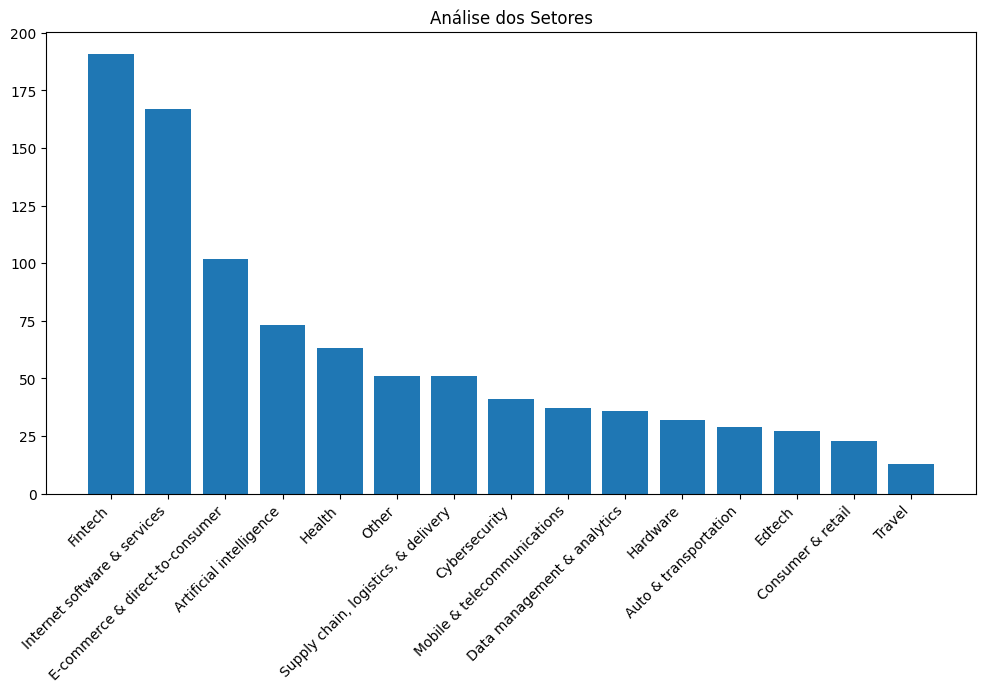

In [65]:
# Visualizando os Setores graficamente
plt.figure( figsize=(12,6) )
plt.title('Análise dos Setores')
plt.bar( df['Setor'].value_counts().index, df['Setor'].value_counts() )
plt.xticks( rotation=45, ha='right' );

### Análise por País

In [66]:
# Quantidade de países com Statups
df.nunique()[4:5]

País    44
dtype: int64

In [67]:
#Quantidade de Startups por país - Top 20
df['País'].value_counts()[:10]

United States     479
China             169
India              51
United Kingdom     37
Germany            23
Israel             21
France             19
Canada             15
Brazil             15
South Korea        11
Name: País, dtype: int64

In [68]:
# Análise dos países em porcentagem - Top 10
round( df['País'].value_counts( normalize=True ) * 100, 1 )[:10]

United States     51.2
China             18.1
India              5.4
United Kingdom     4.0
Germany            2.5
Israel             2.2
France             2.0
Canada             1.6
Brazil             1.6
South Korea        1.2
Name: País, dtype: float64

In [69]:
# Total dos dois maiores países em porcentagem
round( df['País'].value_counts( normalize=True )[:2] * 100, 1 ).sum()

69.30000000000001

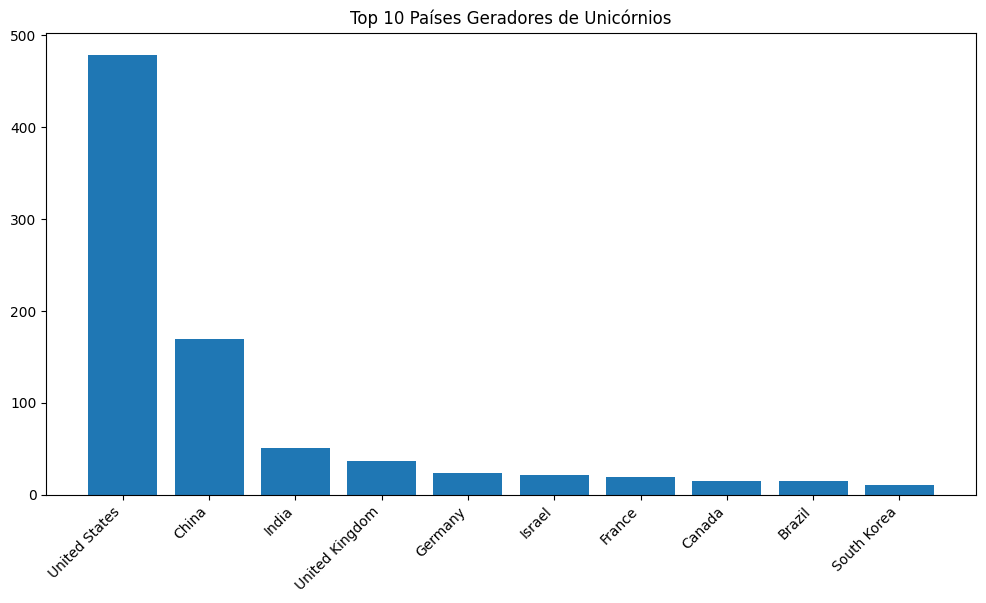

In [70]:
# Gráfico de Barras com os Top 10 países que mais geram Startups
plt.figure( figsize=(12,6) )
plt.title('Top 10 Países Geradores de Unicórnios')
plt.bar( df['País'].value_counts()[:10].index, df['País'].value_counts()[:10] )
plt.xticks( rotation=45, ha='right' );

In [71]:
# Visualizando a distribuição de Startups pelo mundo
import folium

mapa = folium.Map( location=[0, 0], zoom_start=2 )

for key, value in paises.items():
  if int(value[2]) > 100:
    folium.Marker(
        location=[ value[0], value[1]],
        tooltip = key + ': ' + str(value[2]) + ' Startups | Valor Total: $ ' + str(value[3]) + ' de dólares.',
        icon=folium.map.Icon(color='red')
        ).add_to(mapa)
  elif int(value[2]) > 10 and int(value[2]) < 100:
    folium.Marker(
        location=[ value[0], value[1]],
        tooltip = key + ': \n' + str(value[2]) + ' Startups | Valor Total: $ ' + str(value[3]) + ' de dólares.',
        icon=folium.map.Icon(color='orange')
        ).add_to(mapa)
  else:
    folium.Marker(
        location=[ value[0], value[1]],
        tooltip = key + ': \n' + str(value[2]) + ' Startups | Valor Total: $ ' + str(value[3]) + ' de dólares.'
        ).add_to(mapa)

mapa

Acima temos os países com mais de 100 Startups com os balões vermelhos, os países com mais de 10 e menos de 100 Startups com balões laranjas e os países com menos de 10 Startups com balões azuis.

### Análise por data

In [72]:
# As cinco Startups mais antigas
df[['Empresa','Valor ($)','País','Setor','Dia','Mes','Ano']].sort_values(['Ano','Mes','Dia'])[:5]

,Empresa,Valor ($),País,Setor,Dia,Mes,Ano
557,Veepee,1.38,France,E-commerce & direct-to-consumer,20,7,2007
224,VANCL,3.00,China,E-commerce & direct-to-consumer,14,12,2010
99,Vice Media,5.70,United States,Internet software & services,2,4,2011
3,Klarna,45.60,Sweden,Fintech,12,12,2011
349,Trendy Group International,2.00,Hong Kong,Consumer & retail,13,2,2012


In [73]:
# As cinco Startups mais novas (até o ano de 2021)
df[['Empresa','Valor ($)','País','Setor','Dia','Mes','Ano']].sort_values(['Ano','Mes','Dia'], ascending=False)[:5]

,Empresa,Valor ($),País,Setor,Dia,Mes,Ano
597,Incode Technologies,1.25,United States,Cybersecurity,7,12,2021
639,AgentSync,1.20,United States,Fintech,7,12,2021
640,Pristyn Care,1.20,India,Health,7,12,2021
932,Anyscale,1.00,United States,Artificial intelligence,7,12,2021
935,Pet Circle,1.00,Australia,E-commerce & direct-to-consumer,7,12,2021


In [74]:
# Relação das Startups brasileiras, com seu ano de fundação e o valor de mercado
df_brasil[['Empresa', 'Ano', 'Valor ($)']]

,Empresa,Ano,Valor ($)
12,Nubank,2018,30.00
13,Movile,2018,1.00
14,iFood,2018,1.00
15,Loggi,2019,2.00
16,QuintoAndar,2019,5.10
17,EBANX,2019,1.00
18,Wildlife Studios,2019,3.00
19,Loft,2020,2.90
20,C6 Bank,2020,5.05
21,Creditas,2020,1.75


In [75]:
# Valor total das Startups brasileiras
Analise_pais.loc[ Analise_pais['País'] == 'Brazil','Valor ($)'].values[0]

61.05

In [78]:
# As 5 maiores Startups brasileiras - Top 5
df_brasil[['Empresa', 'Valor ($)']].sort_values('Valor ($)', ascending=False)[:5]

,Empresa,Valor ($)
12,Nubank,30.00
16,QuintoAndar,5.10
20,C6 Bank,5.05
23,Nuvemshop,3.10
18,Wildlife Studios,3.00


### Análise por valor

In [80]:
# Os 15 maiores países somando os valores de mercado de suas Startups = Os Top 15
Analise_pais.sort_values('Valor ($)', ascending=False)[:15]

,País,Valor ($)
42,United States,1607.03
8,China,569.48
41,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
36,Sweden,58.08
1,Australia,50.60
21,Israel,43.82
17,Hong Kong,41.45


### Fim